In [1]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [2]:
temp_samples <- read.delim('map_to_contigs.tsv')
samples <- temp_samples[2:25]
row.names(samples) <- as.vector(temp_samples[,1])

In [3]:
group <- rep(c("H","T"),12)
HH <- rep(c(TRUE,FALSE),12)
TT <- rep(c(FALSE,TRUE),12)

In [4]:
sample_labels <- paste0(rep(c("H","T"),12),c(rbind(sprintf("%03d", c(1,2,3,4,5,6,7,9,10,11,12,13)),sprintf("%03d", c(1,2,3,4,5,6,7,9,10,11,12,13)))))

colvect <- ifelse(HH,"red","blue")


Call:
 randomForest(x = t(samples), y = as.factor(group), ntree = 5000,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 5000
No. of variables tried at each split: 22

        OOB estimate of  error rate: 70.83%
Confusion matrix:
   H T class.error
H  5 7   0.5833333
T 10 2   0.8333333

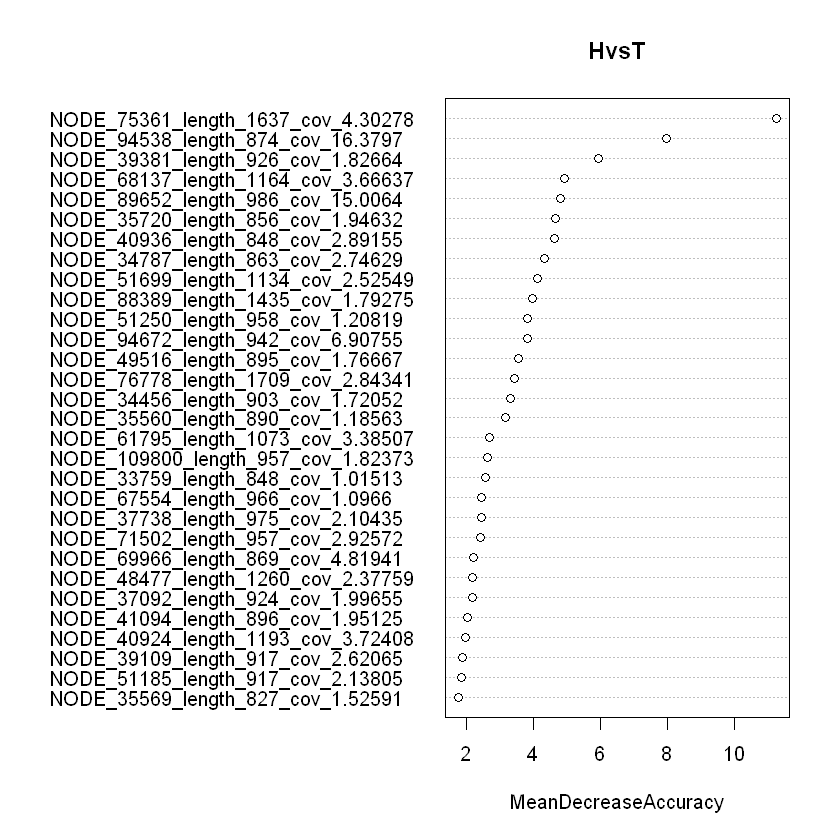

In [5]:
ht_rf <- randomForest(x=t(samples),y=as.factor(group), importance=TRUE, ntree=5000)
varImpPlot(ht_rf, type = 1,main="HvsT")
ht_rf


Call:
 randomForest(x = t(ht_samples2), y = as.factor(group), ntree = 500,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 29.17%
Confusion matrix:
  H  T class.error
H 6  6  0.50000000
T 1 11  0.08333333

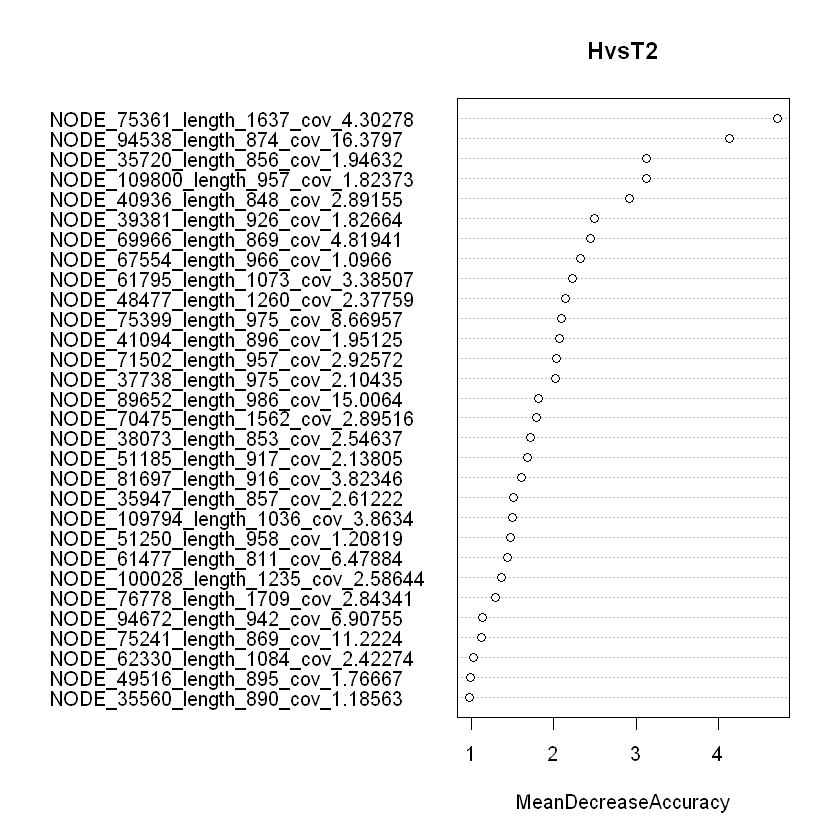

In [7]:
ht_samples2 <- samples[rownames(ht_rf$importance[order(ht_rf$importance[,3],decreasing = TRUE),])[1:50],]
ht_rf2 <- randomForest(x=t(ht_samples2),y=as.factor(group), importance=TRUE, ntree=500)
varImpPlot(ht_rf2, type = 1,main="HvsT2")
ht_rf2

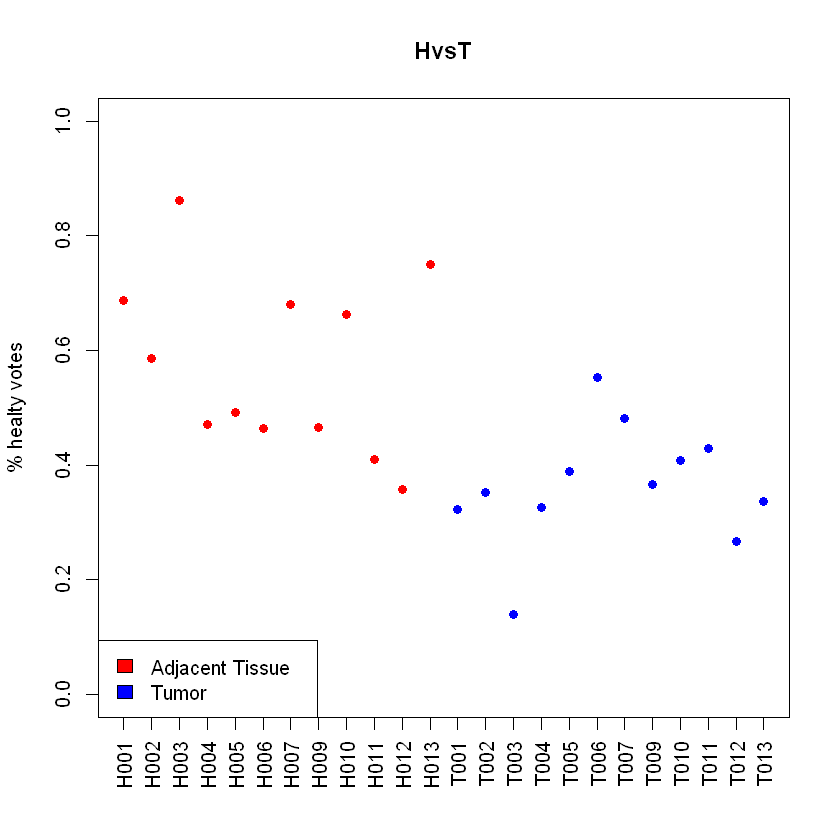

In [8]:
ordered <- c(ht_rf2$votes[,1][HH],ht_rf2$votes[,1][TT])
order_color <- c(rep("red",sum(HH)),rep("blue",sum(TT)))
plot(ordered,col=order_color,ylim=c(0,1),main="HvsT", pch=16,xaxt='n',xlab = "",ylab = "% healty votes")
axis(1, at=1:24, labels=c(sample_labels[HH],sample_labels[TT]),las=2)
legend("bottomleft",legend=c("Adjacent Tissue","Tumor"),fill=c("red","blue"))

In [13]:
colnames(ht_samples2)<-group
write.table(ht_samples2,file=paste0("best_hits.txt"), quote = FALSE)

In [11]:
ht_samples2


,mapped_CRC001_H_single.sam,mapped_CRC001_T_single.sam,mapped_CRC002_H_single.sam,mapped_CRC002_T_single.sam,mapped_CRC003_H_single.sam,mapped_CRC003_T_single.sam,mapped_CRC004_H_single.sam,mapped_CRC004_T_single.sam,mapped_CRC005_H_single.sam,mapped_CRC005_T_single.sam,...,mapped_CRC009_H_single.sam,mapped_CRC009_T_single.sam,mapped_CRC010_H_single.sam,mapped_CRC010_T_single.sam,mapped_CRC011_H_single.sam,mapped_CRC011_T_single.sam,mapped_CRC012_H_single.sam,mapped_CRC012_T_single.sam,mapped_CRC013_H_single.sam,mapped_CRC013_T_single.sam
NODE_75361_length_1637_cov_4.30278,3,2,4,2,7,0,0,0,2,1,...,3,0,3,1,0,1,1,0,7,0
NODE_94538_length_874_cov_16.3797,19,6,6,5,13,2,0,1,3,1,...,4,1,0,1,0,3,2,2,8,1
NODE_89652_length_986_cov_15.0064,24,20,149,21,1087,24,240,20,30,18,...,21,21,201,20,16,57,14,20,93,5
NODE_39381_length_926_cov_1.82664,1,0,2,0,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0
NODE_68137_length_1164_cov_3.66637,9,5,1,0,9,1,0,2,2,0,...,2,3,9,4,1,4,1,2,2,1
NODE_94672_length_942_cov_6.90755,69,16,12,10,50,8,4,8,8,4,...,7,10,18,6,4,5,7,10,37,3
NODE_49516_length_895_cov_1.76667,14,3,0,39,1,3,0,5,2,3,...,1,0,0,1,0,1,0,1,3,3
NODE_51699_length_1134_cov_2.52549,24,8,10,4,33,2,24,12,5,3,...,3,8,2,4,1,6,11,5,17,2
NODE_40936_length_848_cov_2.89155,0,2,0,2,0,0,0,4,0,0,...,0,0,0,0,0,0,0,1,0,1
NODE_76778_length_1709_cov_2.84341,8,3,0,0,10,2,0,2,0,0,...,0,1,2,0,0,1,0,1,1,3
